In [3]:
import numpy as np

scores = np.array([42, 47, 59, 27, 84, 49, 72, 43, 73, 59, 58, 82, 50, 79, 89, 75, 70, 59, 67, 35])

In [42]:
def range_norm(data, high , low):
    min = np.min(data)
    max = np.max(data)

    normalized_data = (high - low) * ((data - min) / (max - min)) + low
    return normalized_data

[0.24193548 0.32258065 0.51612903 0.         0.91935484 0.35483871
 0.72580645 0.25806452 0.74193548 0.51612903 0.5        0.88709677
 0.37096774 0.83870968 1.         0.77419355 0.69354839 0.51612903
 0.64516129 0.12903226]


In [44]:
print(range_norm(scores, 1, 0))

[0.24193548 0.32258065 0.51612903 0.         0.91935484 0.35483871
 0.72580645 0.25806452 0.74193548 0.51612903 0.5        0.88709677
 0.37096774 0.83870968 1.         0.77419355 0.69354839 0.51612903
 0.64516129 0.12903226]


In [45]:
print(range_norm(scores, 1, -1))

[-0.51612903 -0.35483871  0.03225806 -1.          0.83870968 -0.29032258
  0.4516129  -0.48387097  0.48387097  0.03225806  0.          0.77419355
 -0.25806452  0.67741935  1.          0.5483871   0.38709677  0.03225806
  0.29032258 -0.74193548]


In [10]:
def standard_norm(data):
    std = np.std(data, ddof=1)
    mean = np.mean(data)
    print("Standard deviation: ", std)
    print("Mean: ", mean)
    normalized_data = (data - mean)/std
    return normalized_data

In [9]:
print(standard_norm(scores))

standard deviation:  17.25192590316864
mean:  60.95
[-1.09842809 -0.80860537 -0.11303086 -1.96789623  1.33608272 -0.69267629
  0.6405082  -1.04046355  0.69847274 -0.11303086 -0.1709954   1.22015363
 -0.63471175  1.04626     1.62590543  0.81440183  0.52457911 -0.11303086
  0.35068548 -1.50417989]


In [104]:
import pandas as pd
IQ = pd.Series([92, 107, 83, 101, 107, 92, 99, 119, 93, 106, 105, 88, 106, 90, 97, 118, 120, 72, 100, 104])

sorted_IQ = np.sort(IQ)

In [99]:
def equal_width_bin(data, num_bins):

    binned_edges = pd.cut(data, bins=num_bins, retbins=True, include_lowest=True)
    
    return binned_edges

In [100]:
print(equal_width_bin(sorted_IQ, 5))

([(71.951, 81.6], (81.6, 91.2], (81.6, 91.2], (81.6, 91.2], (91.2, 100.8], ..., (100.8, 110.4], (100.8, 110.4], (110.4, 120.0], (110.4, 120.0], (110.4, 120.0]]
Length: 20
Categories (5, interval[float64, right]): [(71.951, 81.6] < (81.6, 91.2] < (91.2, 100.8] < (100.8, 110.4] < (110.4, 120.0]], array([ 71.952,  81.6  ,  91.2  , 100.8  , 110.4  , 120.   ]))


/Users/matthewxu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


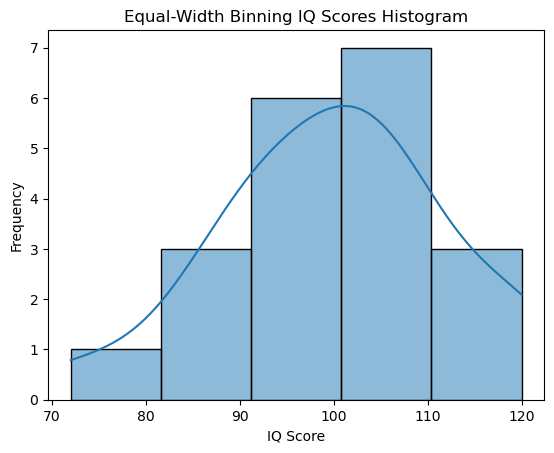

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(sorted_IQ, kde=True, bins=5)
plt.title('Equal-Width Binning IQ Scores Histogram')
plt.xlabel('IQ Score')
plt.ylabel('Frequency')
plt.show()

In [114]:
def equal_frequency_bin(data, num_bins):

    binned_edges, bins = pd.qcut(data, q=num_bins, retbins=True)
    
    return binned_edges, bins

In [115]:
print(equal_frequency_bin(sorted_IQ, 5))

([(71.999, 91.6], (71.999, 91.6], (71.999, 91.6], (71.999, 91.6], (91.6, 98.2], ..., (104.4, 107.0], (104.4, 107.0], (107.0, 120.0], (107.0, 120.0], (107.0, 120.0]]
Length: 20
Categories (5, interval[float64, right]): [(71.999, 91.6] < (91.6, 98.2] < (98.2, 104.4] < (104.4, 107.0] < (107.0, 120.0]], array([ 72. ,  91.6,  98.2, 104.4, 107. , 120. ]))


/Users/matthewxu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


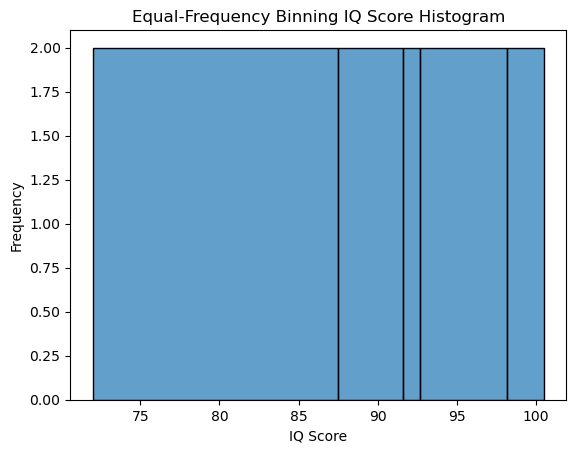

In [138]:
# Calculate bin edges for equal-frequency binning
bin_edges = np.percentile(sorted_IQ, np.linspace(0, 50, 5+1))

sns.histplot(sorted_IQ, bins=bin_edges, edgecolor='black', alpha=0.7)

plt.title('Equal-Frequency Binning IQ Score Histogram')
plt.xlabel('IQ Score')
plt.ylabel('Frequency')

plt.show()